In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine

In [3]:
# Load Datasets

In [4]:
customers = pd.read_csv(r'C:\Users\DELL\Downloads\Data Science intenship assignment\Customers.csv')
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [5]:
products = pd.read_csv(r'C:\Users\DELL\Downloads\Data Science intenship assignment\Products.csv')
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [7]:
transactions = pd.read_csv(r'C:\Users\DELL\Downloads\Data Science intenship assignment\Transactions.csv')
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [8]:
# Task 1: Exploratory Data Analysis (EDA)

In [9]:
# Check for missing values

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Well, there is no missing values in datasets

In [11]:
# Convert date columns to datetime

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [12]:
# Merge datasets for analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')


In [13]:
# Summary statistics
print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [14]:
# Visualizations and Insights

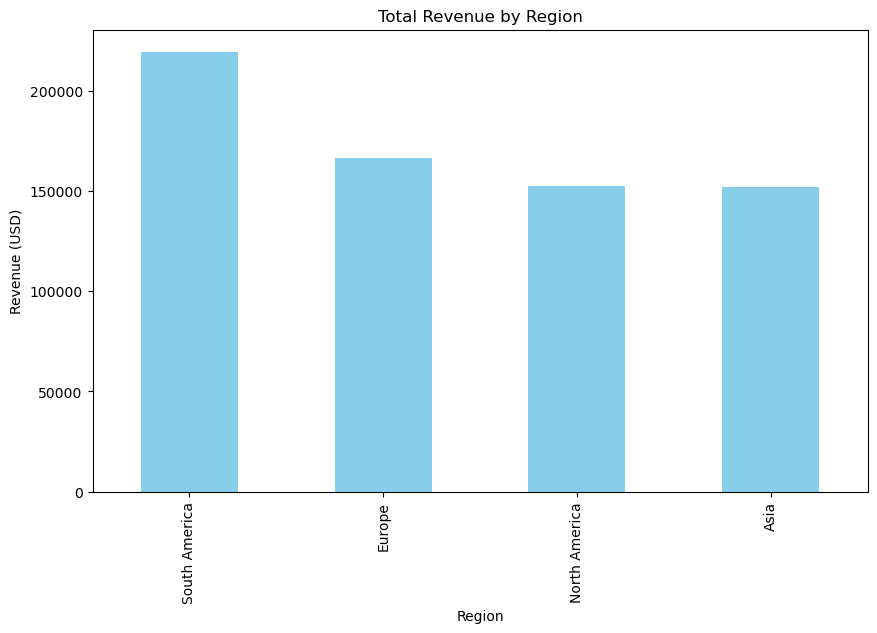

In [15]:
# Total revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.show()

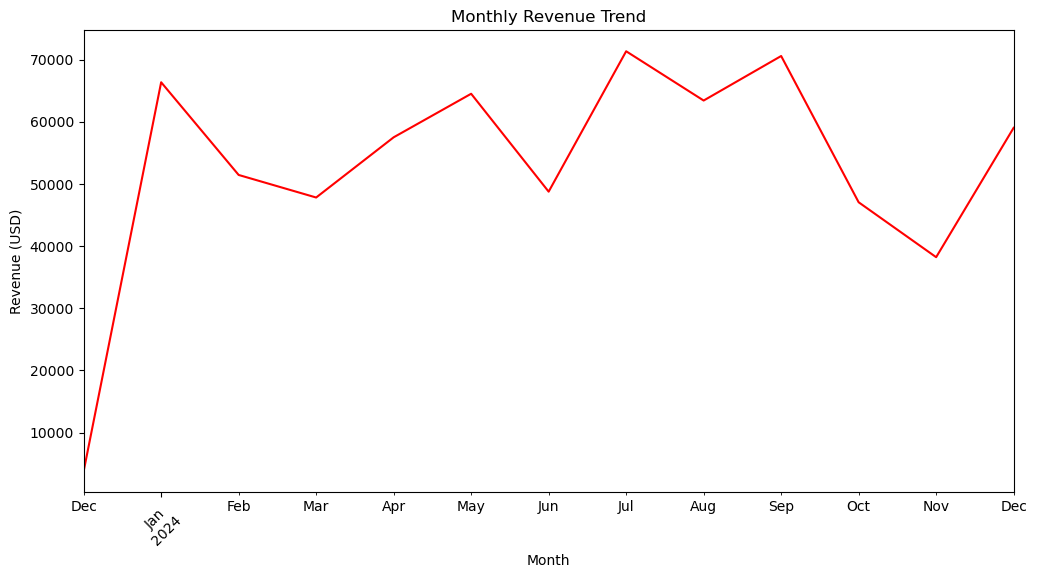

In [16]:
# Monthly revenue trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(color='red')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

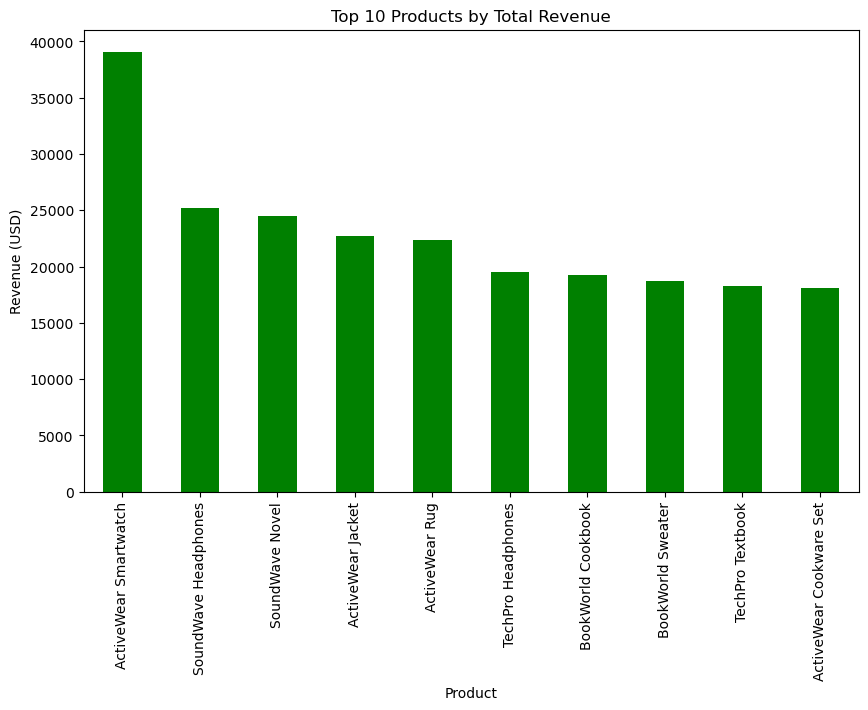

In [17]:
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_revenue.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Products by Total Revenue')
plt.ylabel('Revenue (USD)')
plt.xlabel('Product')
plt.show()

In [19]:
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
top_products = product_revenue.head(10)
print(top_products)


ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


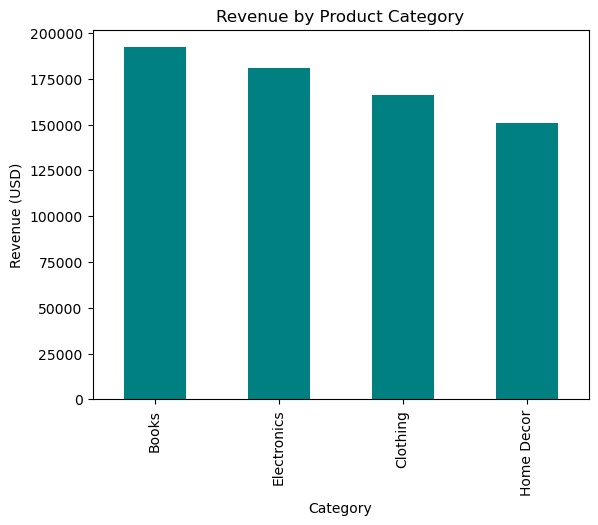

In [20]:
# Product category analysis
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='teal')
plt.title('Revenue by Product Category')
plt.ylabel('Revenue (USD)')
plt.xlabel('Category')
plt.show()

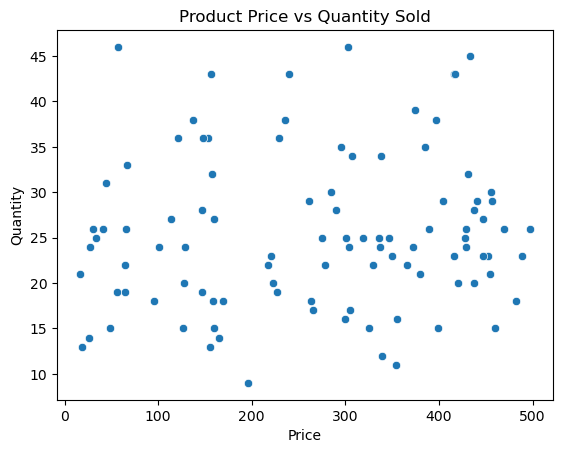

In [21]:
# Load the Transactions.csv file into a DataFrame
transactions = pd.read_csv(r'C:\Users\DELL\Downloads\Data Science intenship assignment\Transactions.csv')

# Checking if the file is loaded correctly
transactions.head()

# Aggregating data to get average price and total quantity sold per product
product_price_quantity = transactions[['ProductID', 'Price', 'Quantity']].groupby('ProductID').agg({'Price': 'mean', 'Quantity': 'sum'}).reset_index()

# Visualizing the relationship with a scatter plot
sns.scatterplot(x='Price', y='Quantity', data=product_price_quantity)

# Display the plot
plt.title('Product Price vs Quantity Sold')
plt.show()